In [25]:
import rasterio
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, mapping
import cartopy.crs as ccrs
from cartopy.io.img_tiles import StamenTerrain
import seaborn as sns
from planet import api
import folium
import json
sns.set();

# Planet Image Coverage Study – Rainier (JHRL data)

In [2]:
_sensorRaw = pd.read_csv("../data/snow_summary_all_2009_2017_locs.csv")
_sensorRaw.head()

,Study,Location,date_min,date_max,temp_min,temp_max,hobo,ibutton,year,calibration_temp,snow_appearance_date,snow_disappearance_date,snow_cover_duration,minimum_soil_temp,longitude,latitude
0,Ailene,AE10-G1,10/5/11 15:00,7/24/12 11:23,-1.114,21.855,True,False,2012,0.000000,11/3/11,7/15/12,254,-1.114,-121.74346,46.76869
1,Ailene,AE10-G1,9/13/12 12:00,8/5/13 12:00,-2.494,27.370,True,False,2013,0.186820,10/21/12,7/4/13,243,-2.494,-121.74346,46.76869
2,Ailene,AE10-G2,10/5/11 15:00,7/11/12 17:22,-1.114,42.998,True,False,2012,0.000000,11/3/11,7/7/12,248,-1.114,-121.74407,46.76837
3,Ailene,AE10-G2,9/13/12 12:00,8/5/13 3:00,-1.001,46.850,True,False,2013,0.370098,10/21/12,6/25/13,237,-1.001,-121.74407,46.76837
4,Ailene,AE10-G3,10/5/11 15:00,7/11/12 16:13,-1.570,24.062,True,False,2012,0.000000,11/3/11,7/6/12,243,-1.570,-121.74390,46.76855


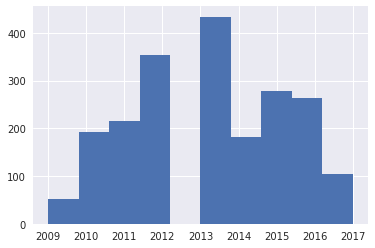

In [3]:
_sensorRaw['year'].hist()

In [4]:
locations = _sensorRaw.dropna().drop_duplicates('Location')

In [5]:
geometry = [Point(xy) for xy in zip(locations.longitude, locations.latitude)]
locations_gpd = gpd.GeoDataFrame(locations, geometry=geometry)
locations_gpd.crs = {'init' : 'epsg:4237'}

Text(0,0.5,'Number')

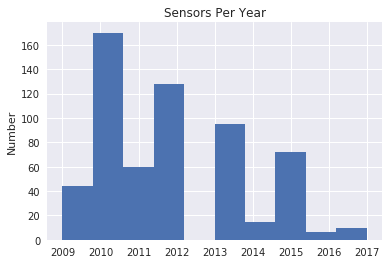

In [6]:
locations['year'].hist()
plt.title("Sensors Per Year")
plt.ylabel("Number")

In [21]:
center = locations_gpd.cascaded_union.centroid
envelope = locations_gpd.cascaded_union.convex_hull
m = folium.Map([center.y, center.x])
folium.GeoJson(locations_gpd[locations_gpd["year"] >= 2016].dropna().geometry).add_to(m)
folium.GeoJson(mapping(envelope)).add_to(m)

m

In [26]:
json.dumps(mapping(envelope))

'{"type": "Polygon", "coordinates": [[[-121.91632, 46.73899], [-121.91641000000001, 46.73915], [-121.91672, 46.739740000000005], [-121.88728, 46.994679999999995], [-121.53754920000002, 46.994992100000005], [-121.53741979999998, 46.99495506], [-121.5352794, 46.99410449], [-121.402, 46.888740000000006], [-121.55821, 46.741009999999996], [-121.91632, 46.73899]]]}'

In [8]:
?folium.GeoJson

In [27]:
from planet import api
aoi = mapping(envelope)
client = api.ClientV1()


query = api.filters.and_filter(
    api.filters.geom_filter(aoi), 
    api.filters.date_range('acquired', gt="2018-01-18"),
    api.filters.date_range('acquired', lt="2018-01-20")
)
# we are requesting PlanetScope 4 Band imagery
item_types = ['PSScene4Band']
request = api.filters.build_search_request(query, item_types)
# this will cause an exception if there are any API related errors
results = client.quick_search(request)

In [ ]:
poly = 
for item in results.iter_items():
    